## MIE424 (2024 Winter) Lab 2

Presented by Johnny Kim


## 1. Introduction & Objectives

**The Objective:** Today we are translating the Week 2 lecture theory into a functional implementation. We are focusing on univariate optimization using the Bisection method.

**The Goals:**

- **Mathematical:** Verify the requirement for a sign change in the derivative ($f'(a) \cdot f'(b) < 0$).
- **Algorithmic:** Analyze the interval-halving logic.
- **Computational:** Evaluate the $O(\log_2)$ complexity using the provided Python framework.

In this lab, you will be implementing the Bisection method for finding a local optimum of a univariate function. See Chapter 3.7 in [ALG].

In [2]:
from typing import Callable, Tuple, Optional

import matplotlib.pyplot as plt
import abc
import math
import numpy as np

%matplotlib inline

### The UnivariateFunction class

In this lab, we define each test function to be a child class of the superclass called *UnivariateFunction*. Any class that inherits this superclass should be specified by a domain and range (range is only for visualization). Also, we need to implement the *prime* method which returns the derivative of the function evaluated at a specific $x$ value.

In [ ]:
class UnivariateFunction:
    def __init__(self, a: float, b: float, ya: Optional[float] = None, yb: Optional[float] = None):
        self.a: float = a
        self.b: float = b
        if ya is not None:
            self.ya: float = ya
        if yb is not None:
            self.yb: float = yb

    @abc.abstractmethod
    def prime(self, *args, **kwargs) -> float:
        """Implement f'(x)=df/dx(x)"""
        pass

    @abc.abstractmethod
    def __call__(self, x: float) -> float:
        """Implement f(x)"""
        pass

    @property
    def xrange(self):                       # Just for plotting
        if not hasattr(self, '_xrange'):
            self._xrange = np.linspace(self.a, self.b, 100)
        return self._xrange

    def plot(self):
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$f$')
        ax.set_xlim(self.a, self.b)
        ax2 = ax.twinx()
        ax2.set_ylabel(r"$f'$")
        if hasattr(self, 'ya') and hasattr(self, 'yb'):
            ax.set_ylim(self.ya, self.yb)
        fline = ax.plot(self.xrange, np.vectorize(self)(self.xrange), 'b-', label='f')
        f_p_line = ax2.plot(self.xrange, np.vectorize(self.prime)(self.xrange), 'c-', label="f'")
        f_p_zero = ax2.axhline(0, color='c', linestyle='-.', lw=1)
        lines = fline + f_p_line
        ax.legend(lines, [l.get_label() for l in lines], loc=0)
        return fig, ax

Let's now define an example test function to play with (Problem02 from [here](http://infinity77.net/global_optimization/test_functions_1d.html)):
 $f_{P2}(x) = \sin(x) + \sin\big(\frac{10}{3}x\big)$.

The domain bound constraint is $x\in[2.7,7.5]$; and a rough range is $y\in [-2.0, 1.0]$.

With this, complete the following code that implements $f(x)$ and $f'(x)$.

In [ ]:
class Problem2(UnivariateFunction):

    def __init__(self, a: float = 2.7, b: float = 7.5, ya=-2.0, yb=1.0):
        super().__init__(a, b, ya=ya, yb=yb)

    def prime(self, x: float) -> float:
        ####################################
        # Your code here
        f_prime = math.cos(x) + 10 / 3 * math.cos(10 / 3 * x)
        return f_prime

        ####################################


    def __call__(self, x: float) -> float:
        ####################################
        # Your code here
        f = math.sin(x) + math.sin(10 / 3 * x)
        return f

        ####################################

You can visualize the test function by calling the *plot* method, which will show you $f$ and $f'$ within the domain.

(<Figure size 300x300 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$f$'>)

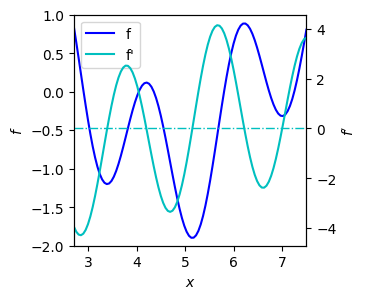

In [ ]:
f2 = Problem2()
f2.plot()

### The Optimizer class

Now, let's define an abstract Optimizer class. An Optimizer object should specify which objective function it is optimizing. Then, by calling the *optimize* method, it should run optimization.

In [ ]:
class Optimizer:
    def __init__(self, func: UnivariateFunction) -> None:
        self.obj_func = func

    @abc.abstractmethod
    def optimize(self, *args, **kwargs):
        """An abstract method that every Opimizer class should implement"""
        pass

    @property
    def obj_func(self) -> UnivariateFunction:
        return self._obj_func

    @obj_func.setter
    def obj_func(self, obj_func: UnivariateFunction):
        self._obj_func: UnivariateFunction = obj_func

    def plot(self, a: float, b: float, i: int):
        fig, ax = self.obj_func.plot()
        aline = ax.axvline(a, color='g', linestyle='--')
        bline = ax.axvline(b, color='m', linestyle='--')
        ax.set_title(f"Iteration: {i}")
        fig.canvas.draw()

### The Bisection method

### The Method
The Bisection method finds an interval within which a local optimum of a given univariate function exists. We are locating the root of the derivative, where $f'(x) = 0$, to identify local optima. The local optimum can be a local minimum or maximum; hence, the method itself is not necessarily an algorithm we can use to specifically find either a local minimum or maximum. In any event, let's just call this an optimizer and name the class as *BisectionOptimizer* that inherits the *Optimizer* class.

### The Logic
If $f'(a)$ and $f'(b)$ have opposite signs, a zero-crossing is guaranteed within the interval $[a, b]$ for continuous derivatives. This is the fundamental principle that makes the Bisection method work.

### The Complexity
As derived in lecture, the number of iterations is $O(\log_2(\frac{b-a}{\epsilon}))$. Because the interval is halved each iteration, doubling the initial search space only adds a single iteration to the process.

### Implementation Overview
We have given you the code for the *optimize* method which calls two subroutines: (1) *bisection* and (2) *get_initial_interval*. Specifically, we get an initial interval to begin the bisection method with from the *get_initial_interval* method which is presented in Algorithm 3.7 of the ALG textbook. Starting from this interval, the *bisection* method should implement Algorithm 3.6 of the ALG textbook, which returns the final interval that contains a local optimum.

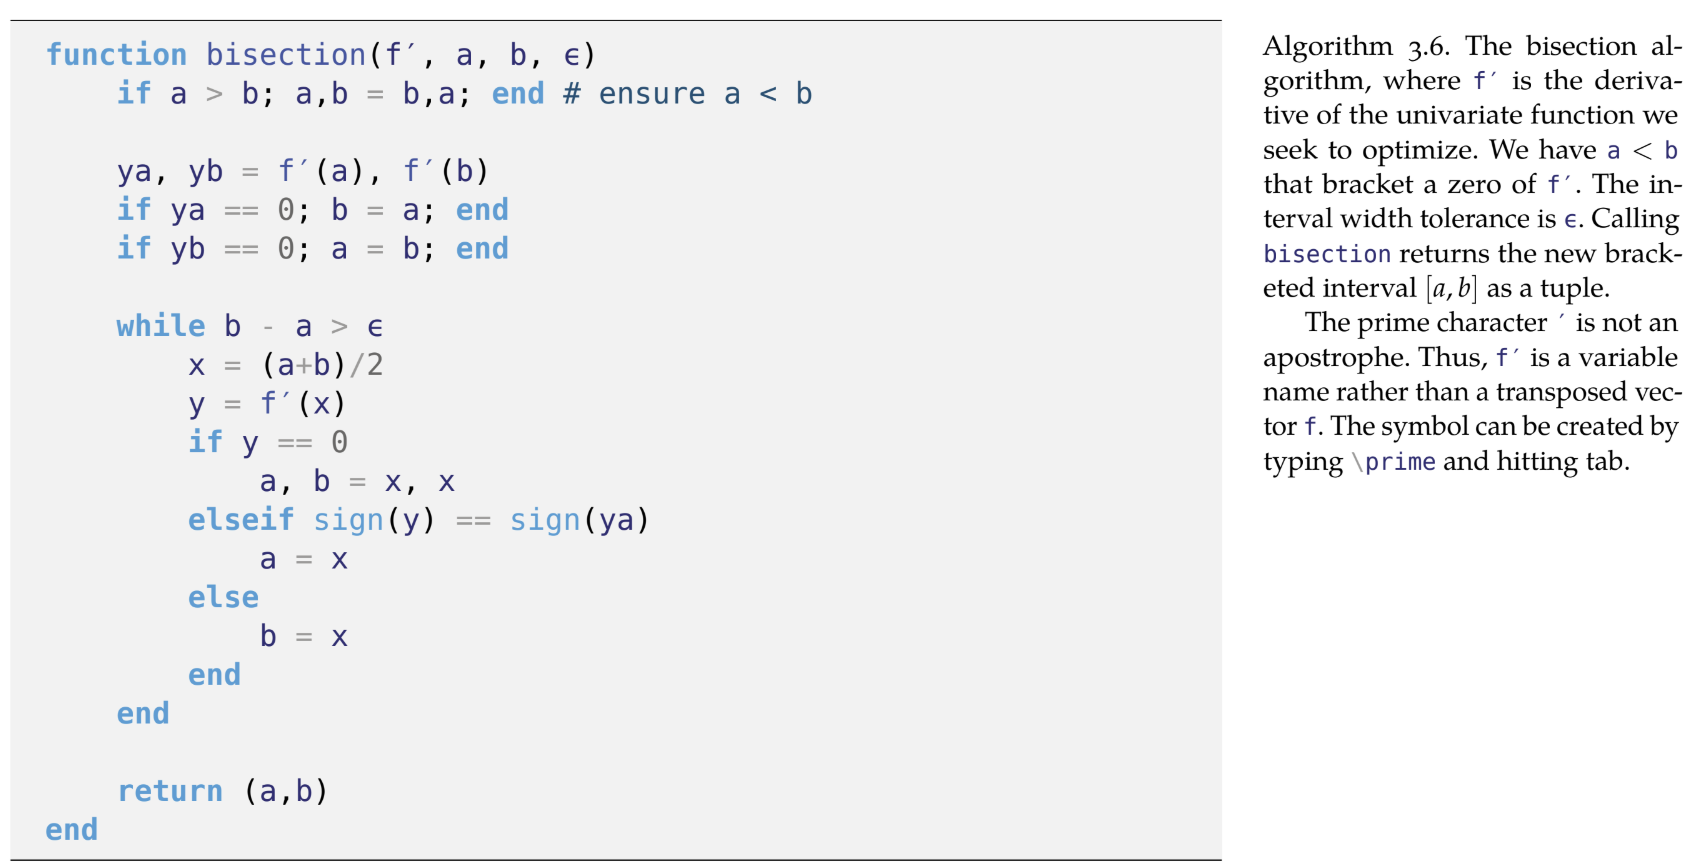

**Problem 2.1** Implement the bisection algorithm given in Algorithm 3.6 of the ALG textbook.

**Problem 2.2** Implement Algorithm 3.7 of the ALG textbook.

In [ ]:
class BisectionOptimizer(Optimizer):
    def __init__(self, func: UnivariateFunction) -> None:
        super().__init__(func)
        self.iter, self.tol = 0, 1e-4

    def optimize(
            self, *args, tol: float=1e-4, plot_period: Optional[int] = None, **kwargs
    ) -> Tuple[float, float]:
        """Optimizes the associated univariate function `obj_func` up to
            a specified tolerance using the Bisection method

        Args:
            tol (float, optional): _description_. Defaults to 1e-4.
        """
        init_a = self.obj_func.a + (self.obj_func.b - self.obj_func.a) / 4
        init_a, init_b = self.get_initial_interval(self.obj_func.prime, init_a, init_a+tol, k=kwargs.get('k', 2))
        a, b = self.bisection(self.obj_func.prime, init_a, init_b, tol=tol, plot_period=plot_period)
        return a, b

    def bisection(
            self, func: Callable, a: float, b: float, tol: float, plot_period: Optional[int] = None,
    ) -> Tuple[float, float]:
        """Given a callable univariate function `func` and an interval [a, b],
            find a new interval that contains a root of the function.

        Args:
            func (Callable): The univariate function
            a (float): The start of the initial interval
            b (float): The end of the initial interval
            tol (float)
            plot_period(int, optional): How often plot the function and current interval.
        """
        if a > b:
            a, b = b, a                 # Ensure a < b

        ya, yb = func(a), func(b)
        if ya == 0:
            b = a
        if yb == 0:
            a = b

        if plot_period:
            self.plot(a, b, 0)

        i = 1
        while b - a > tol:
            ####################################
            # Your code here
            # bisection algoirthm
            x = (a + b) / 2
            y = func(x)

            if y == 0:
                a = x
                b = x
            elif y * ya < 0:
                b = x
            else:
                a = x


            ####################################

            if plot_period and i % plot_period == 0:
                self.plot(a, b, i)
            i += 1

        self.iter, self.tol = i - 1, tol
        return (a, b)

    def get_initial_interval(
            self, func: Callable, a: float, b: float, k: float = 2.0,
    ) -> Tuple[float, float]:
        """Given a callable univariate function `func` and the initial interval [a, b],
            find a new interval such that `func(a)` and `func(b)` have different signs.

        Args:
            func (Callable): The univariate function
            a (float): The start of the initial interval
            b (float): The end of the initial interval
            k (float, optional): The expansion factor. Defaults to 2.

        Returns:
            Tuple[float, float]: A new interval [a_, b_] such that func(a_) and func(b_) have
                different signs.
        """
        if a > b:
            a, b = b, a                 # Ensure a < b

        ####################################
        # Your code here
        # Algorithm 3.7
        center, half_width = (b+a)/2, (b-a)/2
        while func(a)*func(b) > 0:
          half_width *= k
          a = center - half_width
          b = center + half_width


        ####################################

        return a, b


### Test your implementation

Now, let's test your implementation to see if everything works as intended.

In [ ]:
f2 = Problem2()                     # Instantiate the test function
optimizer = BisectionOptimizer(f2)  # Instantiate the bisection optimizer

In [ ]:
a, b = optimizer.optimize()
print(f"Obtained interval: [{a}, {b}]")
print(f"Function values: [{f2(a)}, {f2(b)}]")
print(f"f' values: [{f2.prime(a)}, {f2.prime(b)}]")
print(f"Number of iterations: {optimizer.iter} (tol={optimizer.tol})")

Obtained interval: [4.1965500000006255, 4.196600000000625]
Function values: [0.11909022018069237, 0.11909023094221993]
f' values: [0.0004681993741384449, -3.77403542414223e-05]
Number of iterations: 14 (tol=0.0001)


You can pass in a keyword argument *plot_period* into the *optimize* method to visualize the progress of the Bisection method.

### Step 1: Input Validation (get_initial_interval)

Note the logic: if `func(a)*func(b) > 0`. The algorithm cannot proceed without a bracketed sign change. If both slopes point in the same direction, the method cannot guarantee a root in that interval. The `get_initial_interval` method expands the interval by a factor `k` (default 2.0) until a sign change is found, ensuring we have a valid starting interval for the bisection algorithm.

### Step 2: Iteration Logic (bisection loop)

Observe the midpoint calculation: `x = (a + b) / 2`. We evaluate the function at the midpoint: `y = func(x)`. The update logic checks `y * ya < 0` to determine which side of the interval to keep. If the product is negative, it means `y` and `ya` have opposite signs, so the root lies between `a` and `x`, and we update `b = x`. Otherwise, we update `a = x`. The magnitude of the derivative does not affect the step size—only the sign matters.

### Step 3: Complexity Verification

Run the notebook with `tol = 10^-2`. Run it again with `tol = 10^-12`. Note that while the precision requirement increased by 10 orders of magnitude, the iteration count only increased by approximately 33. This demonstrates the logarithmic scaling of the algorithm. The relationship between tolerance and iterations follows $O(\log_2(\frac{b-a}{\epsilon}))$, which is why doubling the precision requirement only adds roughly one iteration.

Obtained interval: [4.1965500000006255, 4.196600000000625]


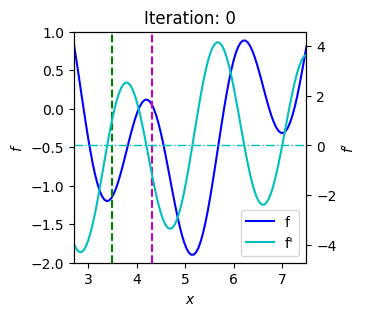

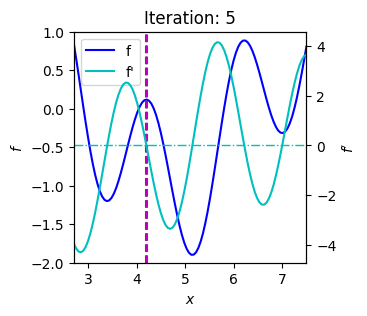

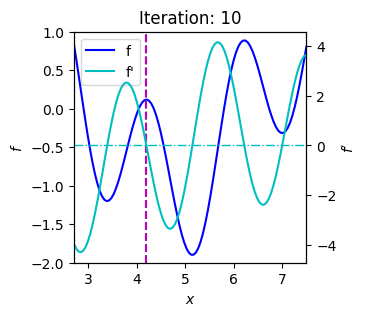

In [ ]:
a, b = optimizer.optimize(plot_period=5)
print(f"Obtained interval: [{a}, {b}]")

In [ ]:
# Complexity Verification: Demonstrating logarithmic scaling
f2 = Problem2()
optimizer = BisectionOptimizer(f2)

# Run with tol = 10^-2
tol1 = 1e-2
a1, b1 = optimizer.optimize(tol=tol1)
iter1 = optimizer.iter
print(f"Tolerance: {tol1:.0e}")
print(f"Number of iterations: {iter1}")
print(f"Obtained interval: [{a1:.10f}, {b1:.10f}]")
print(f"Interval width: {b1 - a1:.10f}\n")

# Run with tol = 10^-12
tol2 = 1e-12
a2, b2 = optimizer.optimize(tol=tol2)
iter2 = optimizer.iter
print(f"Tolerance: {tol2:.0e}")
print(f"Number of iterations: {iter2}")
print(f"Obtained interval: [{a2:.10f}, {b2:.10f}]")
print(f"Interval width: {b2 - a2:.10f}\n")

# Compare the results
print("=" * 50)
print(f"Precision increase: {tol1/tol2:.0e} (10 orders of magnitude)")
print(f"Iteration increase: {iter2 - iter1} iterations")
print(f"Ratio: {(iter2 - iter1) / 10:.1f} iterations per order of magnitude")

Tolerance: 1e-02
Number of iterations: 6
Obtained interval: [4.1950000000, 4.2050000000]
Interval width: 0.0100000000

Tolerance: 1e-12
Number of iterations: 44
Obtained interval: [7.9981288893, 7.9981288893]
Interval width: 0.0000000000

Precision increase: 1e+10 (10 orders of magnitude)
Iteration increase: 38 iterations
Ratio: 3.8 iterations per order of magnitude


### Test on different test functions

2. Problem04

$f_{P4}(x) = -(16x^2-24x+5)\cdot e^{-x}$

The domain bound constraint is $x\in[1.9, 3.9]$; and a rough range is $y\in [-4.0, -2.4]$.

In [ ]:
class Problem4(UnivariateFunction):

    def __init__(self, a: float = 1.9, b: float = 3.9, ya=-4.0, yb=-2.4):
        super().__init__(a, b, ya=ya, yb=yb)

    def prime(self, x: float) -> float:
        ####################################
        # Your code here
        # take the deirtaive of f_p4
        f_prime = (16*x**2-56*x+29)*math.exp(-x)
        ####################
        # return the value of f'


        return f_prime


        ####################################

    def __call__(self, x: float) -> float:
        ####################################
        # Your code here
        f = -(16*x**2-24*x+5)*math.exp(-x)
        return f
        ####################################

In [ ]:
f4 = Problem4()
optimizer.obj_func = f4         # Change the objective function
a, b = optimizer.optimize()
print(f"Obtained interval: [{a}, {b}]")
print(f"Function values: [{f4(a)}, {f4(b)}]")
print(f"f' values: [{f4.prime(a)}, {f4.prime(b)}]")
print(f"Number of iterations: {optimizer.iter} (tol={optimizer.tol})")

Obtained interval: [2.868000000000988, 2.868050000000988]
Function values: [-3.8504507076261887, -3.850450708539693]
f' values: [-6.908392248550422e-05, 3.254281175716124e-05]
Number of iterations: 15 (tol=0.0001)


3. Problem05

$f_{P5}(x) = -(1.4 - 3x)\cdot \sin(18x)$

The domain bound constraint is $x\in[0, 1.2]$; and a rough range is $y\in [-1.5, 2.5]$.

In [ ]:
class Problem5(UnivariateFunction):

    def __init__(self, a: float = 0., b: float = 1.2, ya=-1.5, yb=2.5):
        super().__init__(a, b, ya=ya, yb=yb)

    def prime(self, x: float) -> float:
        ####################################
        # Your code here

        f_prime = math.sin(18*x)-(18*(7/5 - x) * math.cos(18*x))
        return f_prime
        ####################################

    def __call__(self, x: float) -> float:
        ####################################
        # Your code here

        f= (-1) * (1.4 - 3*x)*math.sin(18*x)
        return f
        ####################################

In [ ]:
f5 = Problem5()
optimizer.obj_func = f5
a, b = optimizer.optimize()
print(f"Obtained interval: [{a}, {b}]")
print(f"Function values: [{f5(a)}, {f5(b)}]")
print(f"f' values: [{f5.prime(a)}, {f5.prime(b)}]")
print(f"Number of iterations: {optimizer.iter} (tol={optimizer.tol})")

Obtained interval: [0.2590500000000045, 0.2591500000000045]
Function values: [0.6220874262602754, 0.6218422204554801]
f' values: [0.017169648241655344, -0.019926731500392036]
Number of iterations: 10 (tol=0.0001)


4. Problem07

$f_{P7}(x) = \sin(x) + \sin\big(\frac{10}{3} x \big)+\log(x) -0.84x + 3$

The domain bound constraint is $x\in[2.7,7.5]$; and a rough range is $y\in [-2.0, 3.0]$.

In [ ]:
class Problem7(UnivariateFunction):

    def __init__(self, a: float = 2.7, b: float = 7.5, ya=-2.0, yb=3.0):
        super().__init__(a, b, ya=ya, yb=yb)

    def prime(self, x: float) -> float:
        ####################################
        # Your code here
        f_prime = math.cos(x) + math.cos((10/3)*x) + 1/x - 0.84
        return f_prime
        ####################################

    def __call__(self, x: float) -> float:
        ####################################
        # Your code here
        f = math.sin(x) + math.sin((10/3)* x) + math.log(x) - 0.84*x + 3
        return f
        ####################################

In [ ]:
f7 = Problem7()
optimizer.obj_func = f7
a, b = optimizer.optimize()
print(f"Obtained interval: [{a}, {b}]")
print(f"Function values: [{f7(a)}, {f7(b)}]")
print(f"f' values: [{f7.prime(a)}, {f7.prime(b)}]")
print(f"Number of iterations: {optimizer.iter} (tol={optimizer.tol})")

Obtained interval: [5.229950000002807, 5.230050000002807]
Function values: [-1.5958876538087177, -1.5958517331534932]
f' values: [-0.00023726258063938577, 0.00017534095464677435]
Number of iterations: 15 (tol=0.0001)


### Number of iterations vs. Tolerance ($\epsilon$)

In [ ]:
def plot_iter_vs_tol(optimizer, func=None):
    if func:
        optimizer.obj_func = func

    itr_lst = []
    tol_lst = []
    for e in range(-3, -20, -1):
        tol = math.pow(2, e)
        optimizer.optimize(tol=tol)
        itr_lst.append(optimizer.iter)
        tol_lst.append(tol)

    fig, ax = plt.subplots(1, 1, figsize=(5,3))
    ax.plot(tol_lst, itr_lst)
    ax.set_xscale('log')
    ax.set_xlabel(r"Tolerance $\epsilon$")
    ax.set_ylabel("Iterations")

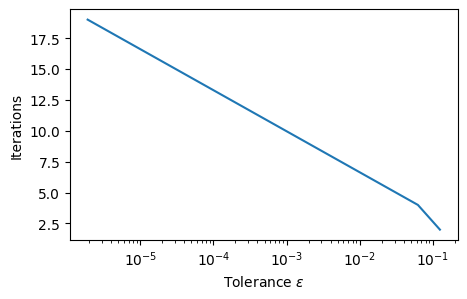

In [ ]:
plot_iter_vs_tol(optimizer, func=f2)

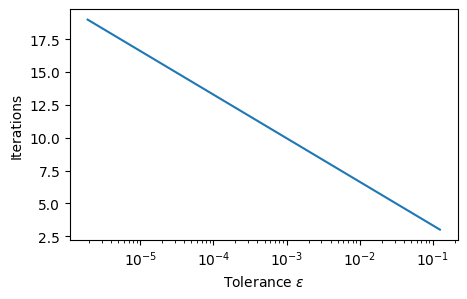

In [ ]:
plot_iter_vs_tol(optimizer, func=f4)

### Key Takeaways

- **Reliability:** Convergence is guaranteed if a sign change is bracketed.
- **Efficiency:** Logarithmic complexity makes the method suitable for high-precision 1D searches.
- **Limitations:** The method is restricted to univariate (1D) problems.

Bisection works well for 1D, but it does not scale to multivariate problems. You will be learning about those methods in the following weeks.